In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X,y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# split data into training and testing data, 50% each

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


In [12]:
# For small data sets its useful to STRATIFY the split. That means that the split retains the 
# class proportions from the original data set

print('Non-Stratified:')
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)
print('-----------------------------------------------------------------')

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123,
                                                    stratify=y)

print('Stratified: ')
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Non-Stratified:
('All:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Training:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Test:', array([ 33.33333333,  33.33333333,  33.33333333]))
-----------------------------------------------------------------
Stratified: 
('All:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Training:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Test:', array([ 33.33333333,  33.33333333,  33.33333333]))


In [13]:
# Use classifier to predict test_y

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct [Accuracy]:
0.96


In [14]:
# Can also visualize the correct and failed predictions

print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50 51
 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[44 49 60]


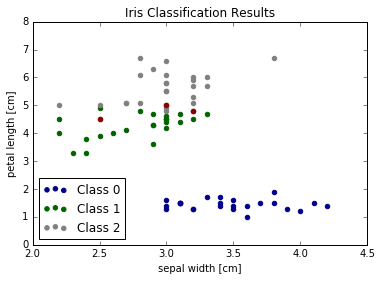

In [15]:
# Plotting on two dimensions

colors = ['darkblue', 'darkgreen', 'gray']

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx,1], test_X[idx,2], color=color, label='Class %s' % str(n))

plt.scatter(test_X[incorrect_idx,1], test_X[incorrect_idx,2], color='darkred', )

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title('Iris Classification Results')
plt.show()